# Data and Sampling Distributions

### Sample
- A subset from a larger data set.
###  Population
- The larger data set or idea of a data set.
###  $N(n)$ 
- The size of the population (sample).
###  Random sampling
- Drawing elements into a sample at random.
###  Simple random sample
- The sample that results from random sampling without stratifying the population.
### Bias
- Systematic error.
### Sample bias
- A sample that misrepresents the population.

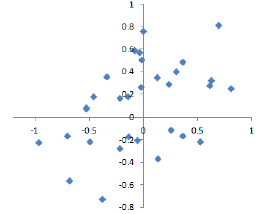   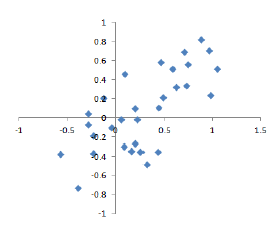

###  Sample statistic
A metric calculated for a sample of data drawn from a larger population.
###  Data distribution
The frequency distribution of individual values in a data set.
###  Sampling distribution
The frequency distribution of a sample statistic over many samples or resamples.
###  Central limit theorem
The tendency of the sampling distribution to take on a normal shape as sample
size rises.
###  Standard error
The variability (standard deviation) of a sample statistic over many samples (not
to be confused with standard deviation, which by itself, refers to variability of
individual data values). That means we get an estimate of the **distance of the sample mean from the population mean**, and this helps in gauging the accuracy of an estimate. 

### Drawing of Random Samples 

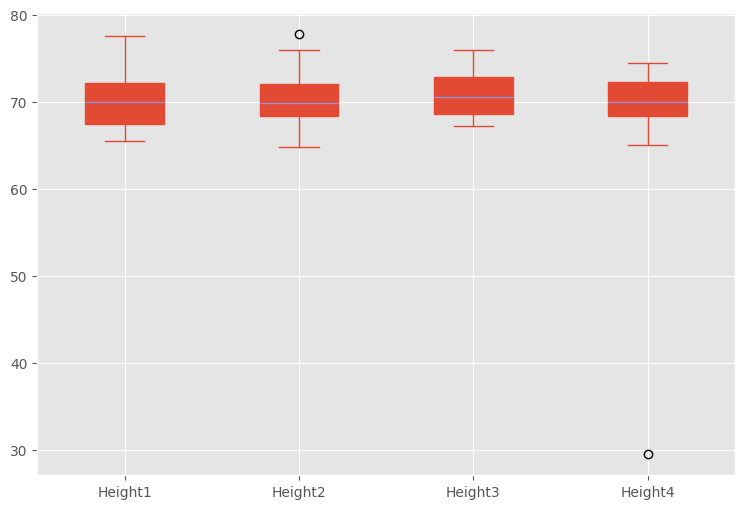

In [1]:
# Draw 4 random samples of Dataframe for attribute Age 
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.colors as mcolors
plt.style.use('ggplot')

data = pd.read_csv("datasets/bodyfat.csv");
atb = "Height"
n = 50


samp1 = data[atb].sample(n,replace=True)
samp2 = data[atb].sample(n,replace=True)
samp3 = data[atb].sample(n,replace=True)
samp4 = data[atb].sample(n,replace=True)

#print(type(age1)) -> series 

# Coverting Series to Dataframes
samp1 = pd.Series(samp1.values,name=atb+str(1)).to_frame()
samp2 = pd.Series(samp2.values,name=atb+str(2)).to_frame()
samp3 = pd.Series(samp3.values,name=atb+str(3)).to_frame()
samp4 = pd.Series(samp4.values,name=atb+str(4)).to_frame()


dfage = pd.concat([samp1,samp2,samp3,samp4],axis=1)
#dfage.describe()

import matplotlib.pyplot as plt
plt.style.use('ggplot')
fig,ax = plt.subplots(figsize=(9,6)) 
ax,props = dfage.plot.box(patch_artist=True, return_type='both', ax=ax)

### Central Limit Theorem


In [ ]:
loans_income = pd.read_csv("c:/home/DSAI/datasets/loans_income.csv");

n = 10  #Sample size
sample_data = loans_income.sample(n,replace=True)

N = 10000  #Number of "Experiments"
sample_data_m = loans_income.sample(N).mean()
sample_mean_05 = [loans_income.sample(5).mean() for _ in range(N)]
sample_mean_05 = pd.DataFrame(sample_mean_05)
sample_mean_05 = sample_mean_05.rename( columns={"x": "sm05" } )
sample_mean_20 = [loans_income.sample(20).mean() for _ in range(N)]
sample_mean_20 = pd.DataFrame(sample_mean_20)
sample_mean_20 = sample_mean_20.rename( columns={"x": "sm20" } )
sample_mean_100 = [loans_income.sample(100).mean() for _ in range(N)]
sample_mean_100 = pd.DataFrame(sample_mean_100)
sample_mean_100 = sample_mean_100.rename(columns={"x": "sm100" } )

results = pd.concat([sample_mean_05, sample_mean_20,sample_mean_100],axis=1)
results.head()
loans_income.hist(bins=30,color="goldenrod",ec="white")
sample_data.hist(bins=30,ec="white")
results[["sm05", "sm20","sm100"]].hist(bins=20,ec="white")
plt.show()

## Bootstrapping 

- is an easy and effective way to estimate the **sampling distribution of a statistic**, or of model parameters, by drawing additional samples, with replacement, from the sample itself and recalculate the statistic or model for each resample.

### Confidence Intervals
- A confidence interval is a range of values that a parameter is expected to fall within
### Confidence level
- The percentage of confidence intervals, constructed in the same way from the same population, that are expected to contain the statistic of interest.
### Interval endpoints
- The top and bottom of the confidence interval.

### Bootstrap Confidence Intervals

- Calculating confidence intervals with the bootstrap involves two steps:
 - Calculate a Population of Statistics
 - Calculate Confidence Intervals
	
#### 1. Calculate a Population of Statistics
``` 
statistics = []
for i in bootstraps:
 sample = select_sample_with_replacement(data)
 stat = calculate_statistic(sample)
 statistics.append(stat)
``` 
#### 2. Calculate Confidence Interval 
```
ordered = sort(statistics)
lower = percentile(ordered, (1-alpha)/2)
upper = percentile(ordered, alpha+((1-alpha)/2))
```


In [ ]:

# check: Loans income population data and a normal 
# distributed simulation of the original data

lim = loans_income.mean()  # mean and std of true population
listd = loans_income.std()

loan_sim = np.random.normal(lim,listd,50000) 
loan_sim = pd.DataFrame(loan_sim, columns=["loan_sim"])

# Check, if loan_income data have a normal distribution  
dfloan = pd.concat([loans_income,loan_sim], axis=1)

dfloan.plot.hist(bins=15,ec="white", alpha=0.6)
plt.legend()
plt.show()

In [ ]:
#from sklearn.utils import resample

# taking 1000 times samples of size 50 from original data 
# and calculate mean

bootresults = []
N = 100
for nrepeat in range(N):  
  # sample = resample(loans_income)
    sample = loans_income.sample(50,replace=True)
    bootresults.append(sample.mean())
dfbootresults = pd.DataFrame(bootresults)


dfbootresults = dfbootresults.rename(columns={"loans_income":"loans_bootstrap"});
loan_sim.hist(bins=10,color = "green",ec="white",alpha=0.9, label ='Income')
dfbootresults.hist(bins=10,color = "red",ec="white",alpha=0.9, label ='Income')
plt.show()

In [ ]:
print('Bootstrap Statistics:')

print(f'original: {loans_income.mean().to_string()}')
print(f'bootstrap: {dfbootresults.mean().to_string()}')
print(f'bias: {dfbootresults["loans_bootstrap"].mean()- loans_income["loans_income"].mean()}')
print(f'std.error: {dfbootresults.std().to_string()}')

In [ ]:
ul = np.percentile(results,2.5)
ol = np.percentile(results,97.5) 
print("Upper and Lower Interval endpoint: ", ul,ol)
dfresults.hist(bins=20,ec="white",color="darkseagreen")
plt.axvline(ul, color='olive', linestyle='dashed', linewidth=1)
plt.axvline(ol, color='olive', linestyle='dashed', linewidth=1)
plt.title("Confidence Intervals of Mean for Loan Income Data",fontsize=10)
plt.show()

In [4]:
import numpy as np
x = [np.random.normal(3,1) for _ in range(400)]
y = [np.random.normal(4,2) for i in range(400)]

In [ ]:
dfx = pd.DataFrame(x, columns=["x"])
dfy = pd.DataFrame(y, columns=["y"])

bin = np.linspace(-10, 10, 100)

#dfx.hist(bins=bin, alpha=0.5, label='x')
#dfy.hist(bins= bin, alpha=0.5, label='y')
dfxy = pd.concat([dfx,dfy], axis=1)
dfxy[["x", "y"]].plot.hist(bins= bin, alpha=0.8)
#plt.legend(loc='upper right')
#plt.show()

In [ ]:

dfloanboot = pd.concat([loan_sim,dfresults], axis=1)
dfloanboot.plot.hist(bins=15,ec="white", alpha=0.6)
plt.legend()
plt.show()

#fig, axes = plt.subplots(1, 2, figsize=(8, 6), sharey=False)
#loan_sim.plot.box(ax=axes[0])
#dfresults.plot.box(ax=axes[1])
#plt.show()

In [ ]:
#data = pd.DataFrame({"Sample Data": loan_sim, "Bootstrap" : dfresults})
result = pd.concat([loan_sim, dfresults], axis=1)
result.plot.box()

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(12, 4)) #constrained_layout=True)
#plt.subplots_adjust(hspace=0.5)
b = 15
sample_data.hist(bins=b, ax=axs[0],color="r")
sample_mean_05.hist(bins=b, ax=axs[1],color="g")
sample_mean_20.hist(bins=b, ax=axs[2],color="y")
sample_mean_100.hist(bins=b, ax=axs[3])

## Probability Distributions

### see : https://docs.scipy.org/doc/scipy/reference/stats.html#discrete-distributions

## Continuous distributions

##### Normal Distribution
$ f(x) = \frac{\exp(-x^2/2)}{\sqrt{2\pi}} $

##### Exponential Distribution
$f(x) = \exp(-x)$

##### Weibull Distribution
$f(x, c) = \lambda \cdot c \cdot (\lambda \cdot c x^{c-1} )\exp(- \lambda x^c)$ Parameter $\ c \in R^+$, often Scale factor $\lambda = 1$

##### Lognormal Distribution
$f(x, s) = \frac{1}{s x \sqrt{2\pi}}
          \exp\left(-\frac{\log^2(x)}{2s^2}\right)$ s $\ldots$ shape parameter

#### Important functions
- $pdf(x, loc=0, scale=1)$ Probability density function.  Standard-Normal Distribution mean = 0 , std = 1
- $logpdf(x, loc=0, scale=1)$ Log of the probability density function.
- $cdf(x, loc=0, scale=1)$ Cumulative distribution function.
- $ppf(q, loc=0, scale=1)$ Percent point function (inverse of cdf — percentiles).
- $stats(loc=0, scale=1, moments=’mv’)$ Mean(‘m’), variance(‘v’), skew(‘s’), and/or kurtosis(‘k’).
- $rvs(loc=0, scale=1, size=1, random_state=None)$ Random variates.

## Discrete distributions

##### Binomial Distribution
$f(k) = \binom{n}{k} p^k (1-p)^{n-k}$

#### Important functions
- $pmf(k, n, p, loc=0)$ Probability mass function.
- $logpmf(k, n, p, loc=0)$ Log of the probability mass function.
- $cdf(k, n, p, loc=0)$ Cumulative distribution function.
- $ppf(q, n, p, loc=0)$ Percent point function (inverse of cdf — percentiles).
- $stats(mu, loc=0, moments=’mv’)$ Mean(‘m’), variance(‘v’), skew(‘s’), and/or kurtosis(‘k’).
- $rvs(n, p, loc=0, size=1, random_state=None)$ Random variates.

##### Poisson Distribution
$f(k) = \exp(-\mu) \frac{\mu^k}{k!}$

0.38400000000000006
0.992
0.24197072451914337
0.5
2.5758293035489004


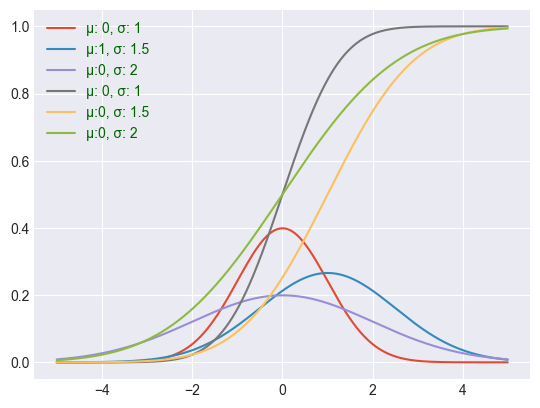

In [5]:
import numpy as np
from scipy import stats

## Binomial Distribution

# Probability 
print(stats.binom.pmf(1, n=3, p=0.2))
print(stats.binom.cdf(2, n=3, p=0.2))

# Normal Distribution
# What is the probabiltiy for x = 0 ?

print(stats.norm.pdf(1,0,1) )
print(stats.norm.cdf(0,0,1))
print(stats.norm.ppf(0.995,0,1))

# Plot normal distribution  between -5 and 5 with .001 steps. 
# Calculating mean = 0/1 and standard deviation = 1/3
x_axis = np.arange(-5, 5, 0.01) 
mean = 1 
sd = 1

#plt.plot(x_axis, stats.norm.pdf(x_axis, mean, sd) ) 
#plt.plot(x_axis, stats.norm.cdf(x_axis, mean, sd)) 
#plt.legend([mean])
#plt.show() 

plt.style.use('seaborn-v0_8-darkgrid')
plt.plot(x_axis, stats.norm.pdf(x_axis, 0, 1), label='μ: 0, σ: 1')
plt.plot(x_axis, stats.norm.pdf(x_axis, 1, 1.5), label='μ:1, σ: 1.5')
plt.plot(x_axis, stats.norm.pdf(x_axis, 0, 2), label='μ:0, σ: 2')
plt.plot(x_axis, stats.norm.cdf(x_axis, 0, 1), label='μ: 0, σ: 1')
plt.plot(x_axis, stats.norm.cdf(x_axis, 1, 1.5), label='μ:0, σ: 1.5')
plt.plot(x_axis, stats.norm.cdf(x_axis, 0, 2), label='μ:0, σ: 2')
plt.legend(labelcolor="darkgreen")


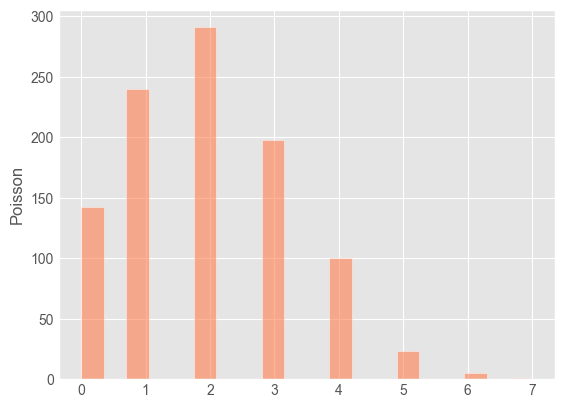

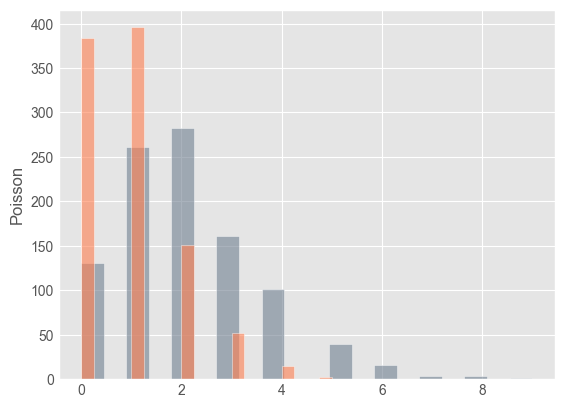

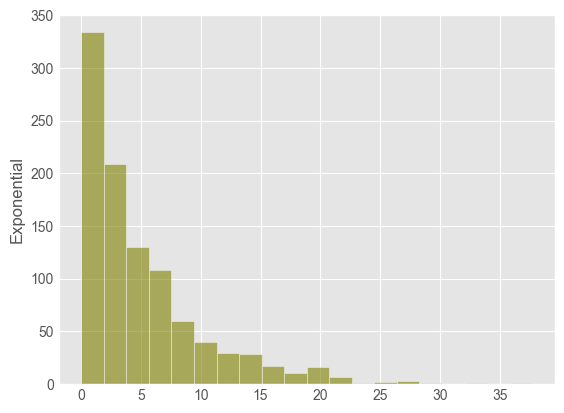

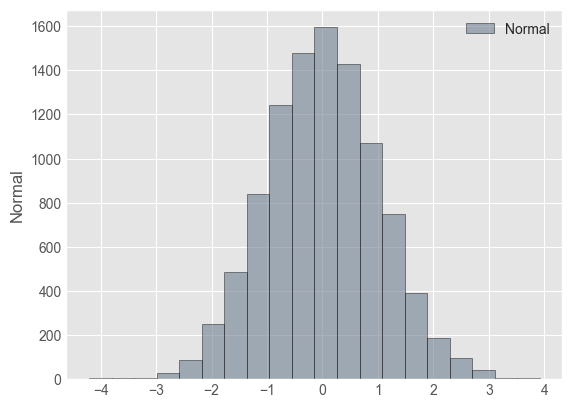

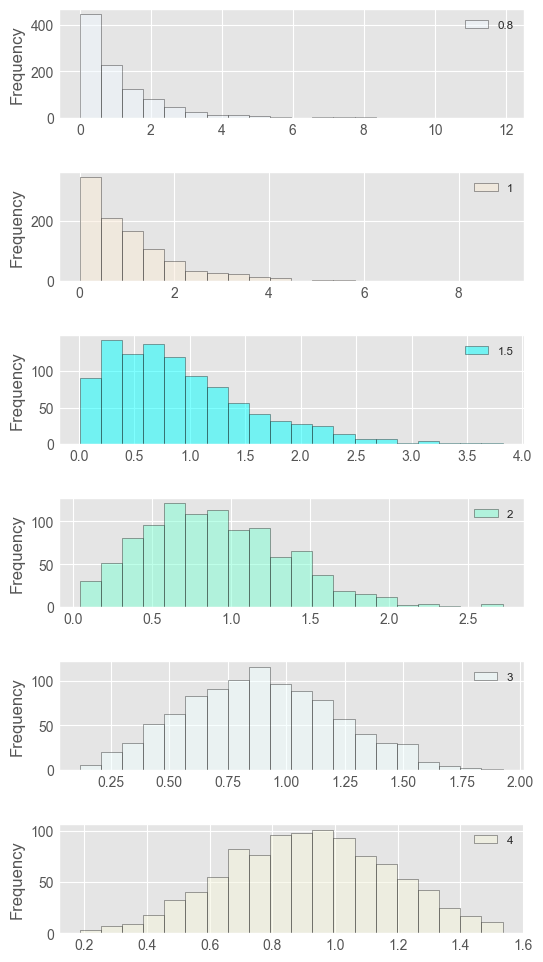

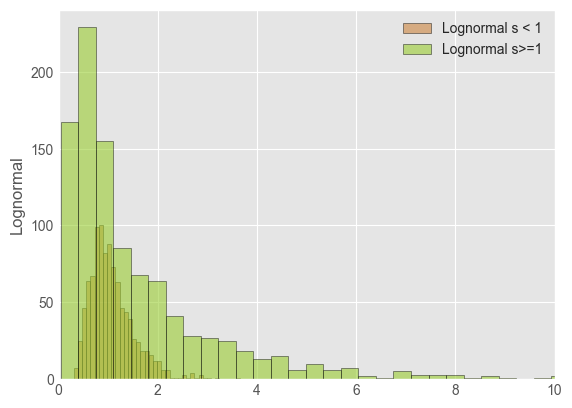

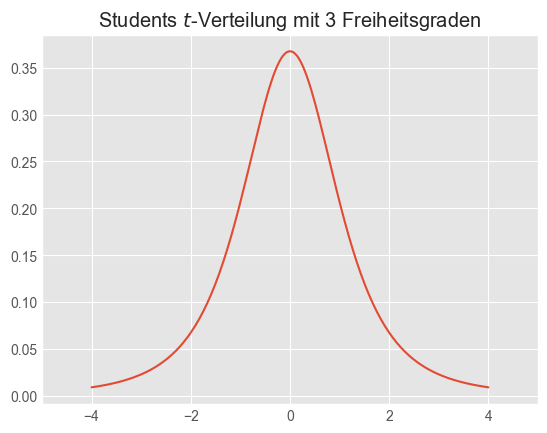

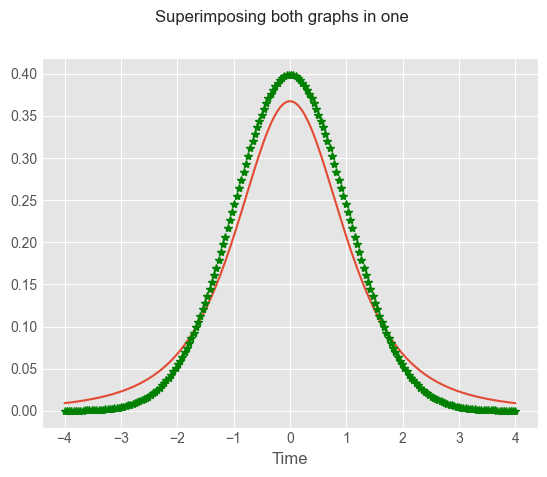

ImportError: Missing optional dependency 'fsspec'.  Use pip or conda to install fsspec.

In [6]:
from sklearn.utils import resample
#import seaborn as sns

plt.style.use('ggplot')
colornames = list(mcolors.CSS4_COLORS)


sample = stats.binom.rvs(n=20, p=0.1,size=1000)
pd.Series(sample).plot.hist(bins=20,color = "coral",ec="white",alpha=0.6, label ='Poisson')
plt.ylabel('Poisson')
plt.show()


## Poisson and Related Distribution
### Poisson Distributions

sample = stats.poisson.rvs(2, size=1000)
pd.Series(sample).plot.hist(bins=20,color = "slategrey",ec="white",alpha=0.6, label ='Poisson')
sample = stats.poisson.rvs(1, size=1000)
pd.Series(sample).plot.hist(bins=20,color = "coral",ec="white",alpha=0.6, label ='Poisson')
plt.ylabel('Poisson')
plt.show()


### Exponential Distribution

sample = stats.expon.rvs(scale=5, size=1000)

pd.Series(sample).plot.hist(bins=20,color = "olive",ec="white",alpha=0.6, label ='Exponential')
plt.ylabel('Exponential')
plt.show()

### Normal Distribution 

sample = stats.norm.rvs(loc=0, scale=1, size=10000)
pd.Series(sample).plot.hist(bins=20,color = "slategrey",ec="black",alpha=0.6, label ='Normal')
plt.ylabel('Normal')
plt.legend()
plt.show()

###  Weibull Distribution
cnr = 0 ;
xs = (x for x in [0.8,1,1.5,2,3,4])

fig, axs = plt.subplots(6, figsize=(6, 12)) #constrained_layout=True)
plt.subplots_adjust(hspace=0.5)
for c in xs:
    sample = stats.weibull_min.rvs(c,loc=0,size=1000)
    pd.Series(sample).plot.hist(bins=20,color = colornames[cnr] ,ec="black",alpha=0.5, 
                                ax = axs[cnr])
    axs[cnr].legend([c],fontsize="small")
    cnr = cnr +1
plt.show()


# Lognormal distrubtion

sample = stats.lognorm.rvs( s=0.4, size=1000)
pd.Series(sample).plot.hist(bins=40,color = "peru",ec="black",alpha=0.6, label ='Lognormal s < 1')
sample = stats.lognorm.rvs( s=1, size=1000)
pd.Series(sample).plot.hist(bins=80,color = "yellowgreen",ec="black",alpha=0.6, label ='Lognormal s>=1')
plt.ylabel('Lognormal')
plt.xlim(0, 10)
plt.legend()
plt.show()


# t Student distribution 

rv = stats.t(df=3, loc=0, scale=1)
x = np.linspace(-4,4,200)
y = rv.pdf(x) 
fig, ax = plt.subplots()
ax.set_title("Students $t$-Verteilung mit 3 Freiheitsgraden")
ax.set_xlim(-5, 5)
ax.plot(x, y)
plt.show()


# Compare t-Student with normal distribution 
yt = stats.t.pdf(x,df=3, loc=0, scale=1)
yn = stats.norm.pdf(x,loc=0, scale=1)
plt.plot(x,yt)
plt.plot(x,yn, "g*")
plt.xlabel("Time")
plt.suptitle("Superimposing both graphs in one")
plt.show()

# Long-Tailed Distributions
# Consider Netflix stock data 
sp500_px = pd.read_csv("C://home/DSAI/datasets/sp500_data.csv")
nflx = sp500_px.NFLX

nflxd = np.diff(nflx) # calculates differences between t and t-1
#print(len(nflxd))
plt.hist(nflxd,bins=50)
plt.xlim(-4,4)
plt.ylim(0,2000)

nflx = np.diff(np.log(nflx[nflx>0]))
fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(nflx, plot=ax)

plt.tight_layout()
plt.show()

### 95% Confidence Interval for Normal distribution

-1.9332872818507965 1.9338139538296193


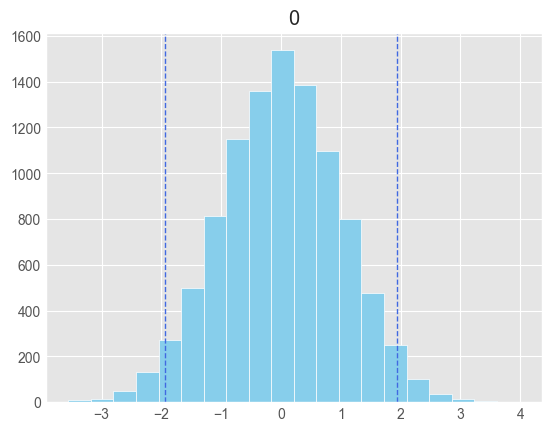

In [7]:
x = np.random.normal(0, 1, 10000)
x = pd.DataFrame(x)
ul = np.percentile(x,2.5)
ol = np.percentile(x,97.5) 
print(ul,ol)
x.hist(bins=20,ec="white",color="skyblue")
plt.axvline(ul, color='royalblue', linestyle='dashed', linewidth=1)
plt.axvline(ol, color='royalblue', linestyle='dashed', linewidth=1)
plt.show()

### Are the data normal distributed ?

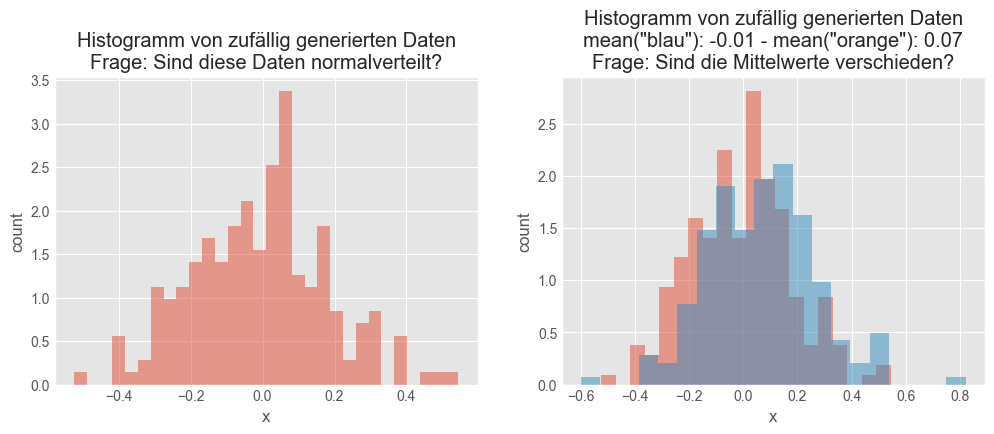

In [8]:
np.random.seed(42) 
mu, sigma = 0, 0.2 # mean and standard deviation
s1 = np.random.normal(loc=mu,scale=sigma,size=200)
s2 = np.random.normal(mu+0.05, sigma, 200)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(s1, 30, density=True, alpha=0.5)
axes[0].set_title("Histogramm von zufällig generierten Daten\nFrage: Sind diese Daten normalverteilt?")
axes[0].set_xlabel("x")
axes[0].set_ylabel("count")

axes[1].hist(s1, 20, density=True, alpha=0.5)
axes[1].hist(s2, 20, density=True, alpha=0.5)
axes[1].set_title('Histogramm von zufällig generierten Daten\nmean("blau"): %.2f - mean("orange"): %.2f\nFrage: Sind die Mittelwerte verschieden?' % (np.mean(s1), np.mean(s2)))
axes[1].set_xlabel("x")
axes[1].set_ylabel("count")

plt.show()